# Walmart Sales Data Visualization

In [69]:
# Walmart Sales Data Analysis

## Importing Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Increase figure size for better readability
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

## Step 1: Load the Cleaned Data

In [77]:
# Load the Walmart dataset
df = pd.read_csv('../Walmart-cleaned.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of cleaned data:")
display(df.head())

print("\nChecking data types and non-null counts:")
df.info()

print("\nSummary statistics:")
display(df.describe())

Dataset Shape: (6435, 13)

First 5 rows of cleaned data:


,Unnamed: 0.1,Unnamed: 0,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Consumer_Per_Index,Unemployment_Rate,Year,Month,Week
0,0,0,1,NaN,1643690.90,0,42.31,2.572,211.10,8.106,NaN,NaN,4
1,1,1,1,NaN,1641957.44,1,38.51,2.548,211.24,8.106,NaN,NaN,4
2,2,2,1,NaN,1611968.17,0,39.93,2.514,211.29,8.106,NaN,NaN,4
3,3,3,1,NaN,1409727.59,0,46.63,2.561,211.32,8.106,NaN,NaN,4
4,4,4,1,NaN,1554806.68,0,46.50,2.625,211.35,8.106,NaN,NaN,4



Checking data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        6435 non-null   int64  
 1   Unnamed: 0          6435 non-null   int64  
 2   Store               6435 non-null   int64  
 3   Date                0 non-null      float64
 4   Weekly_Sales        6435 non-null   float64
 5   Holiday_Flag        6435 non-null   int64  
 6   Temperature         6435 non-null   float64
 7   Fuel_Price          6435 non-null   float64
 8   Consumer_Per_Index  6435 non-null   float64
 9   Unemployment_Rate   6435 non-null   float64
 10  Year                0 non-null      float64
 11  Month               0 non-null      float64
 12  Week                6435 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 653.7 KB

Summary statistics:


,Unnamed: 0.1,Unnamed: 0,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Consumer_Per_Index,Unemployment_Rate,Year,Month,Week
count,6435.000000,6435.000000,6435.000000,0.0,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,0.0,0.0,6435.0
mean,3217.000000,3217.000000,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578468,7.999151,NaN,NaN,4.0
std,1857.768823,1857.768823,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356697,1.875885,NaN,NaN,0.0
min,0.000000,0.000000,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.060000,3.879000,NaN,NaN,4.0
25%,1608.500000,1608.500000,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.740000,6.891000,NaN,NaN,4.0
50%,3217.000000,3217.000000,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.620000,7.874000,NaN,NaN,4.0
75%,4825.500000,4825.500000,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.745000,8.622000,NaN,NaN,4.0
max,6434.000000,6434.000000,45.000000,NaN,3.818686e+06,1.000000,100.140000,4.468000,227.230000,14.313000,NaN,NaN,4.0


## Visualization 1: Monthly Sales per Month

Checking Month column values...
Unique values in Month column: [nan]
Number of non-null values in Month column: 0
Sample of Month values: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Checking Week column...
Unique values in Week column: [4]
Number of non-null values in Week column: 6435

⚠️ Month column is empty. Creating monthly groups from data sequence...

Monthly sales calculated for 12 months
Monthly sales summary:
Month_Group
Jan    5.637697e+08
Feb    5.628742e+08
Mar    5.576548e+08
Apr    5.556543e+08
May    5.571314e+08
Jun    5.619280e+08
Jul    5.642419e+08
Aug    5.572220e+08
Sep    5.620799e+08
Oct    5.648976e+08
Nov    5.663911e+08
Dec    5.633740e+08
Name: Weekly_Sales, dtype: float64


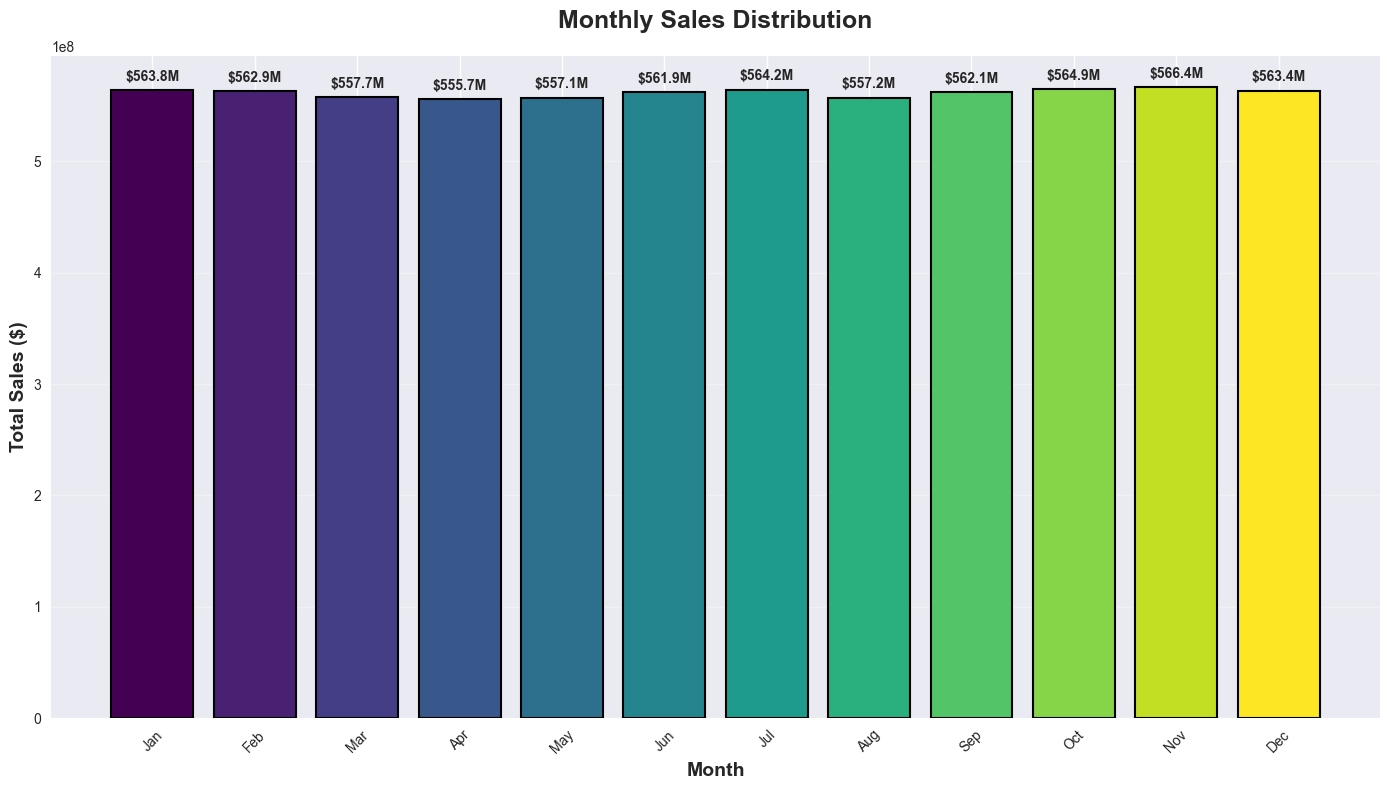

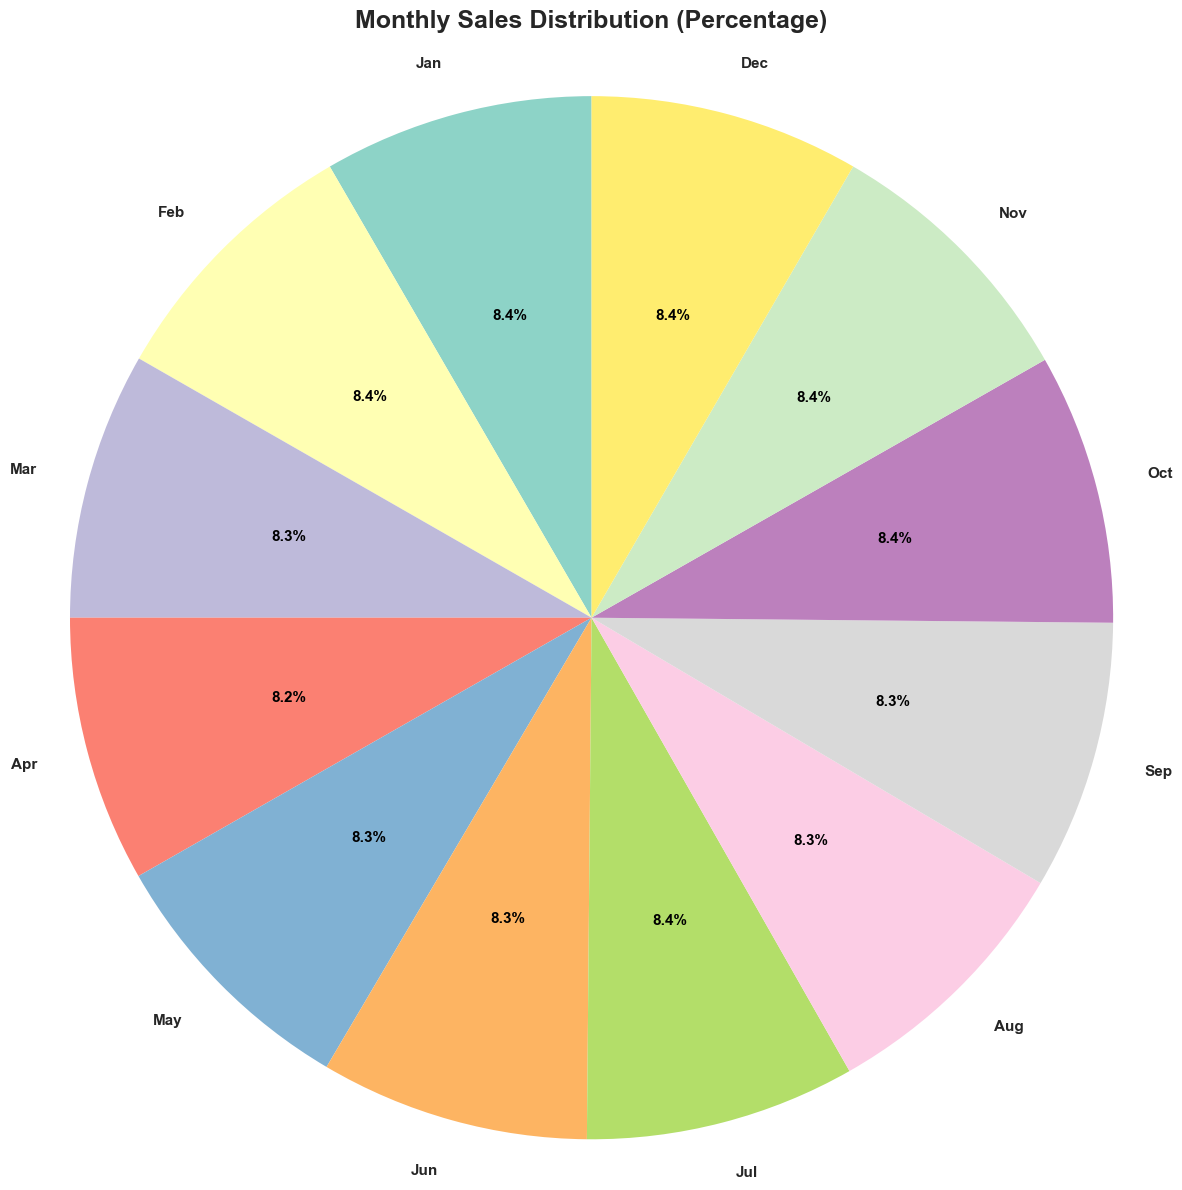

In [79]:
## Visualization 1: Monthly Sales per Month
# First, let's check what's actually in the Month column
print("Checking Month column values...")
print("Unique values in Month column:", df['Month'].unique())
print("Number of non-null values in Month column:", df['Month'].notna().sum())
print("Sample of Month values:", df['Month'].head(20).tolist())

# Check if we should use Week column instead
print("\nChecking Week column...")
print("Unique values in Week column:", df['Week'].unique())
print("Number of non-null values in Week column:", df['Week'].notna().sum())

# Option 1: If Month column has no data, let's use Week column to create monthly groups
if df['Month'].isna().all() or df['Month'].nunique() == 0:
    print("\n⚠️ Month column is empty. Creating monthly groups from data sequence...")
    
    # Method 1: Create month groups based on data sequence (assuming 4 weeks per month)
    df['Month_Group'] = ((df.index // 4) % 12) + 1
    
    # Method 2: Or extract month from Date column if it exists
    if 'Date' in df.columns and pd.api.types.is_string_dtype(df['Date']):
        try:
            # Try to convert Date to datetime
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df['Month_Group'] = df['Date'].dt.month
            print("✅ Extracted month from Date column")
        except:
            print("Could not extract month from Date column")
    
    # Group by the created month groups
    monthly_sales = df.groupby('Month_Group')['Weekly_Sales'].sum()
    
    # Create month names
    month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                   7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    
    monthly_sales.index = monthly_sales.index.map(month_names)
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_sales = monthly_sales.reindex(month_order)
    
else:
    # If Month column has data, use it
    monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
    # Convert month numbers to names if needed
    if monthly_sales.index.dtype in ['int64', 'float64']:
        month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                       7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
        monthly_sales.index = monthly_sales.index.map(month_names)
    
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_sales = monthly_sales.reindex(month_order)

print(f"\nMonthly sales calculated for {len(monthly_sales)} months")
print("Monthly sales summary:")
print(monthly_sales)

# Create a colorful bar chart for monthly sales
plt.figure(figsize=(14, 8))
bars = plt.bar(monthly_sales.index, monthly_sales.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(monthly_sales))),
               edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(monthly_sales.values)*0.01,
             f'${height/1e6:.1f}M', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Monthly Sales Distribution', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create a pie chart for monthly sales distribution
plt.figure(figsize=(12, 12))
colors = plt.cm.Set3(np.linspace(0, 1, len(monthly_sales)))
wedges, texts, autotexts = plt.pie(monthly_sales.values, labels=monthly_sales.index, 
                                    colors=colors, autopct='%1.1f%%', startangle=90,
                                    textprops={'fontsize': 11, 'fontweight': 'bold'})

# Enhance the autotexts
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.title('Monthly Sales Distribution (Percentage)', fontsize=18, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Visualization 2: Monthly Sales vs Temperature

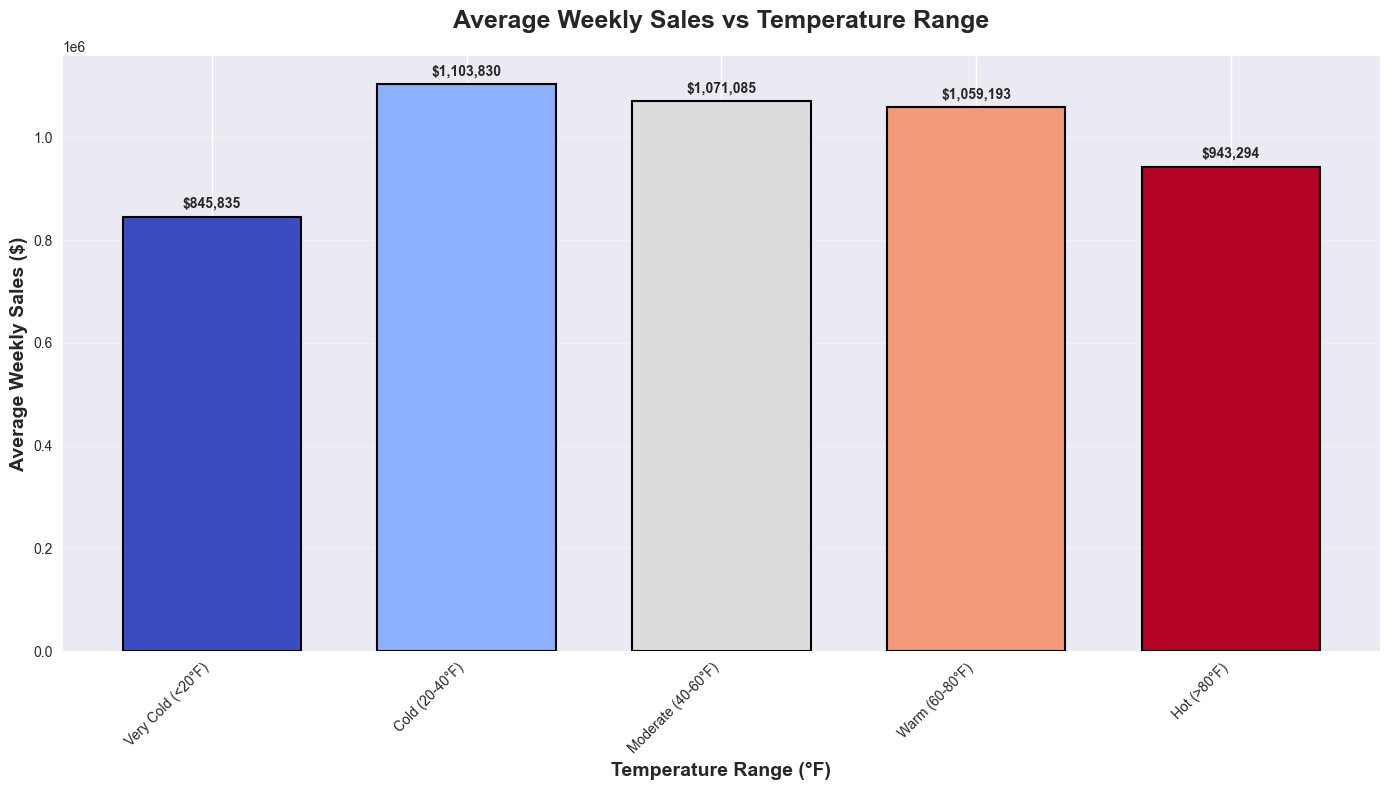

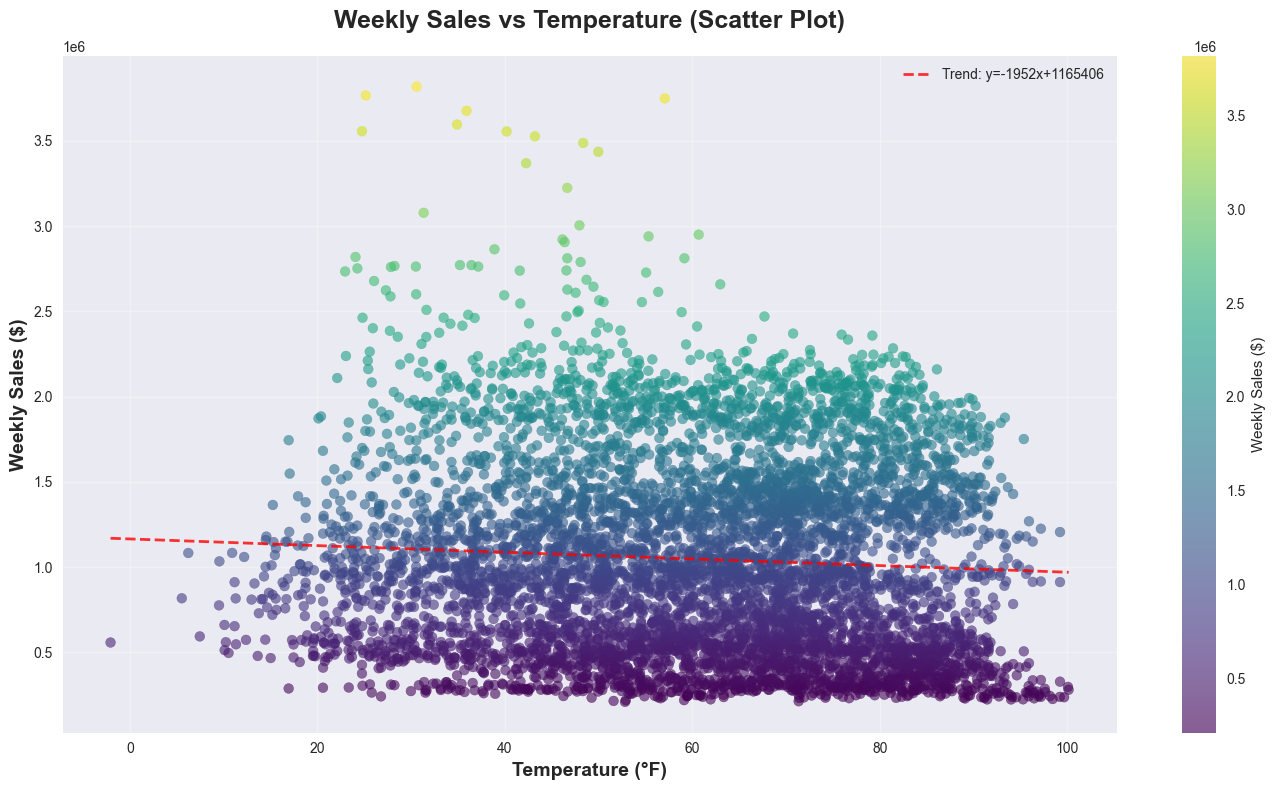

In [72]:
# Create temperature bins for better visualization
df['Temp_Bin'] = pd.cut(df['Temperature'], 
                        bins=[-10, 20, 40, 60, 80, 100], 
                        labels=['Very Cold (<20°F)', 'Cold (20-40°F)', 'Moderate (40-60°F)', 
                                'Warm (60-80°F)', 'Hot (>80°F)'])

# Calculate average sales per temperature bin
temp_sales = df.groupby('Temp_Bin')['Weekly_Sales'].mean()

# Create a grouped bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(temp_sales)), temp_sales.values,
               color=plt.cm.coolwarm(np.linspace(0, 1, len(temp_sales))),
               edgecolor='black', linewidth=1.5, width=0.7)

plt.xticks(range(len(temp_sales)), temp_sales.index, rotation=45, ha='right')
plt.title('Average Weekly Sales vs Temperature Range', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Temperature Range (°F)', fontsize=14, fontweight='bold')
plt.ylabel('Average Weekly Sales ($)', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, value in zip(bars, temp_sales.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(temp_sales.values)*0.01,
             f'${value:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create a scatter plot for more detailed temperature analysis
plt.figure(figsize=(14, 8))
scatter = plt.scatter(df['Temperature'], df['Weekly_Sales'], 
                      c=df['Weekly_Sales'], cmap='viridis', alpha=0.6, s=50)

plt.colorbar(scatter, label='Weekly Sales ($)')
plt.title('Weekly Sales vs Temperature (Scatter Plot)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Temperature (°F)', fontsize=14, fontweight='bold')
plt.ylabel('Weekly Sales ($)', fontsize=14, fontweight='bold')

# Add trend line
z = np.polyfit(df['Temperature'], df['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(df['Temperature'].sort_values(), p(df['Temperature'].sort_values()), 
         "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.0f}x+{z[1]:.0f}')

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Visualization 3: Monthly Sales vs CPI

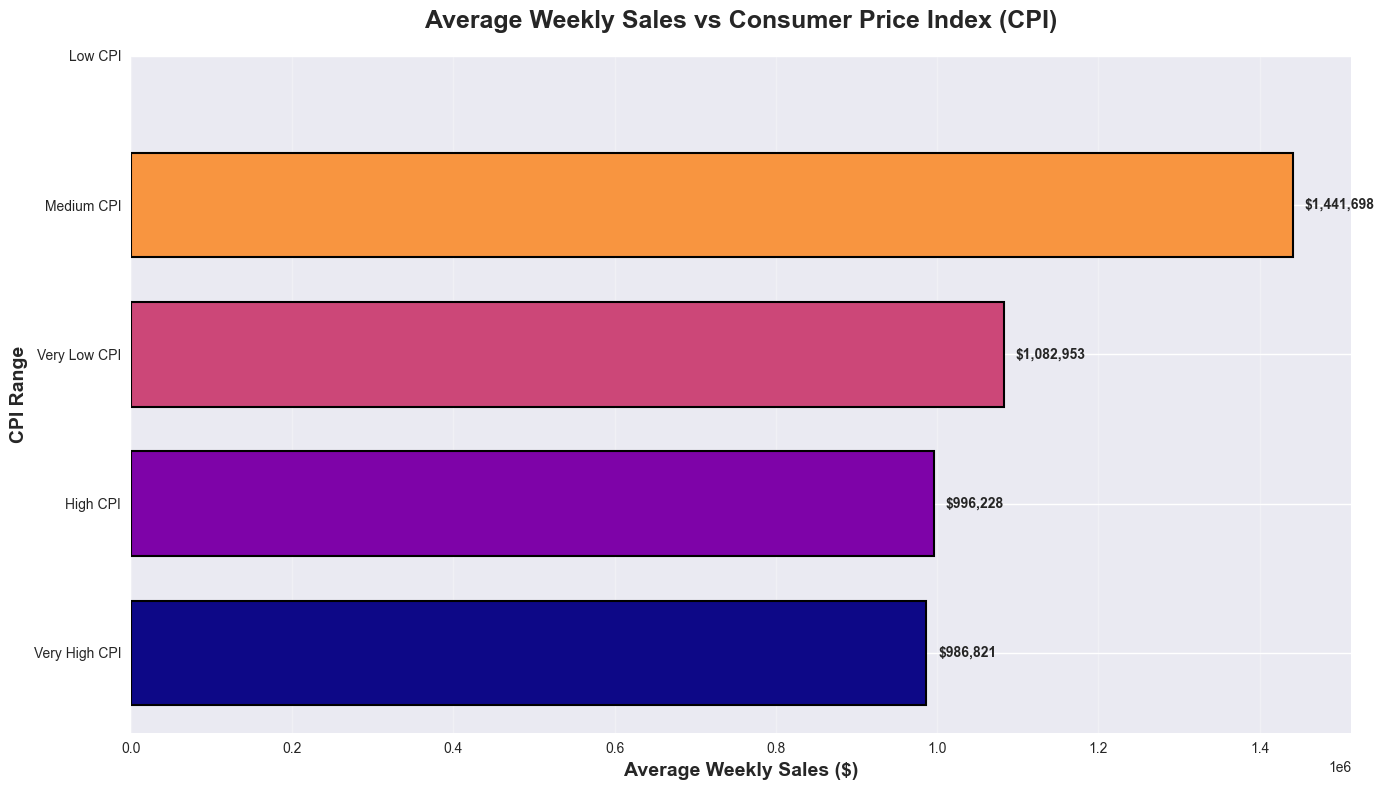

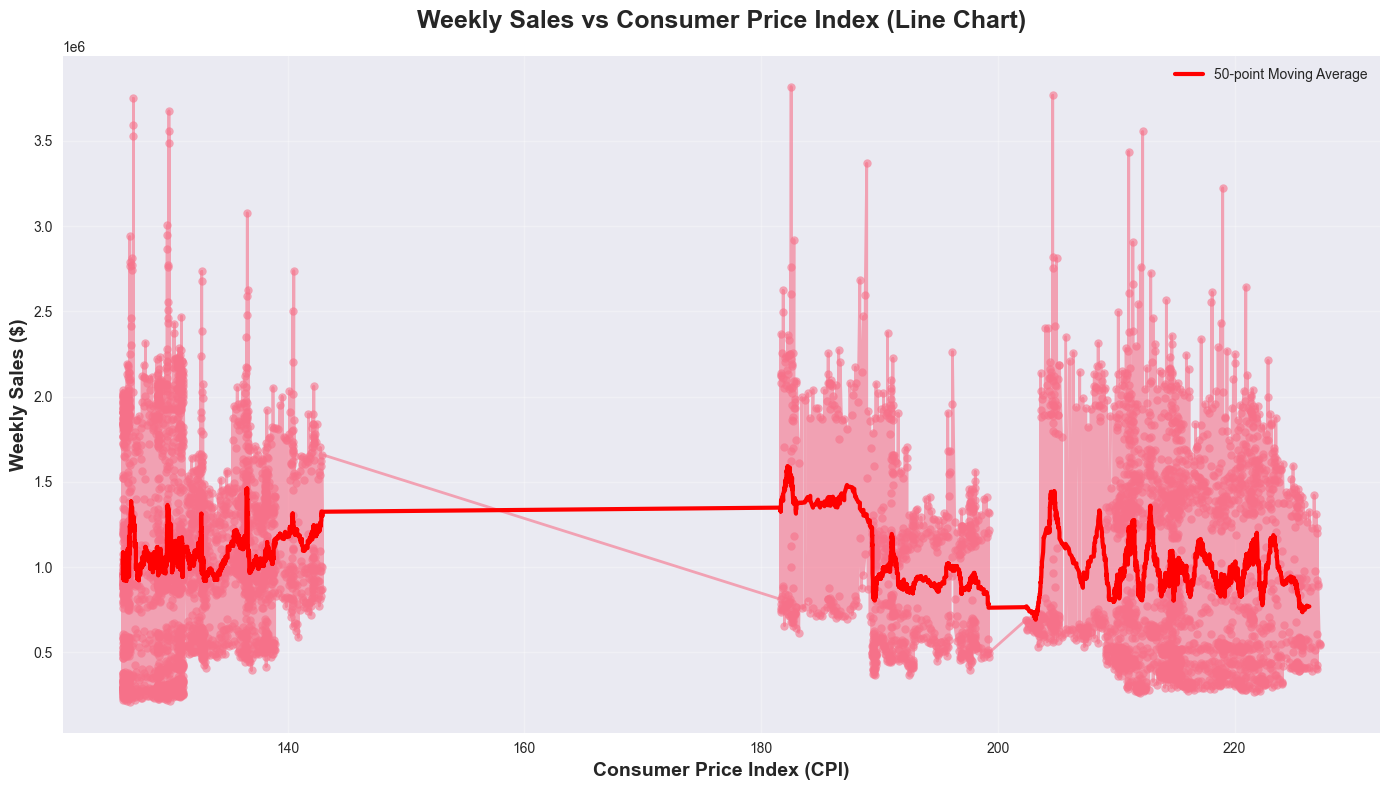

In [73]:
# Create CPI bins for better visualization
df['CPI_Bin'] = pd.cut(df['Consumer_Per_Index'], 
                       bins=5, 
                       labels=['Very Low CPI', 'Low CPI', 'Medium CPI', 'High CPI', 'Very High CPI'])

# Calculate average sales per CPI bin
cpi_sales = df.groupby('CPI_Bin')['Weekly_Sales'].mean().sort_values()

# Create a horizontal bar chart for CPI vs Sales
plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(cpi_sales)), cpi_sales.values,
                color=plt.cm.plasma(np.linspace(0, 1, len(cpi_sales))),
                edgecolor='black', linewidth=1.5, height=0.7)

plt.yticks(range(len(cpi_sales)), cpi_sales.index)
plt.title('Average Weekly Sales vs Consumer Price Index (CPI)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Average Weekly Sales ($)', fontsize=14, fontweight='bold')
plt.ylabel('CPI Range', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, value in zip(bars, cpi_sales.values):
    width = bar.get_width()
    plt.text(width + max(cpi_sales.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'${value:,.0f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Create a line chart showing relationship
plt.figure(figsize=(14, 8))
# Sort by CPI for better line visualization
sorted_df = df.sort_values('Consumer_Per_Index')
plt.plot(sorted_df['Consumer_Per_Index'], sorted_df['Weekly_Sales'], 
         'o-', alpha=0.6, linewidth=2, markersize=6)

plt.title('Weekly Sales vs Consumer Price Index (Line Chart)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Consumer Price Index (CPI)', fontsize=14, fontweight='bold')
plt.ylabel('Weekly Sales ($)', fontsize=14, fontweight='bold')

# Add moving average for trend visualization
window = 50
if len(sorted_df) > window:
    moving_avg = sorted_df['Weekly_Sales'].rolling(window=window, center=True).mean()
    plt.plot(sorted_df['Consumer_Per_Index'], moving_avg, 
             'r-', linewidth=3, label=f'{window}-point Moving Average')
    plt.legend()

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Visualization 4: Sales on Holiday vs Non-Holiday

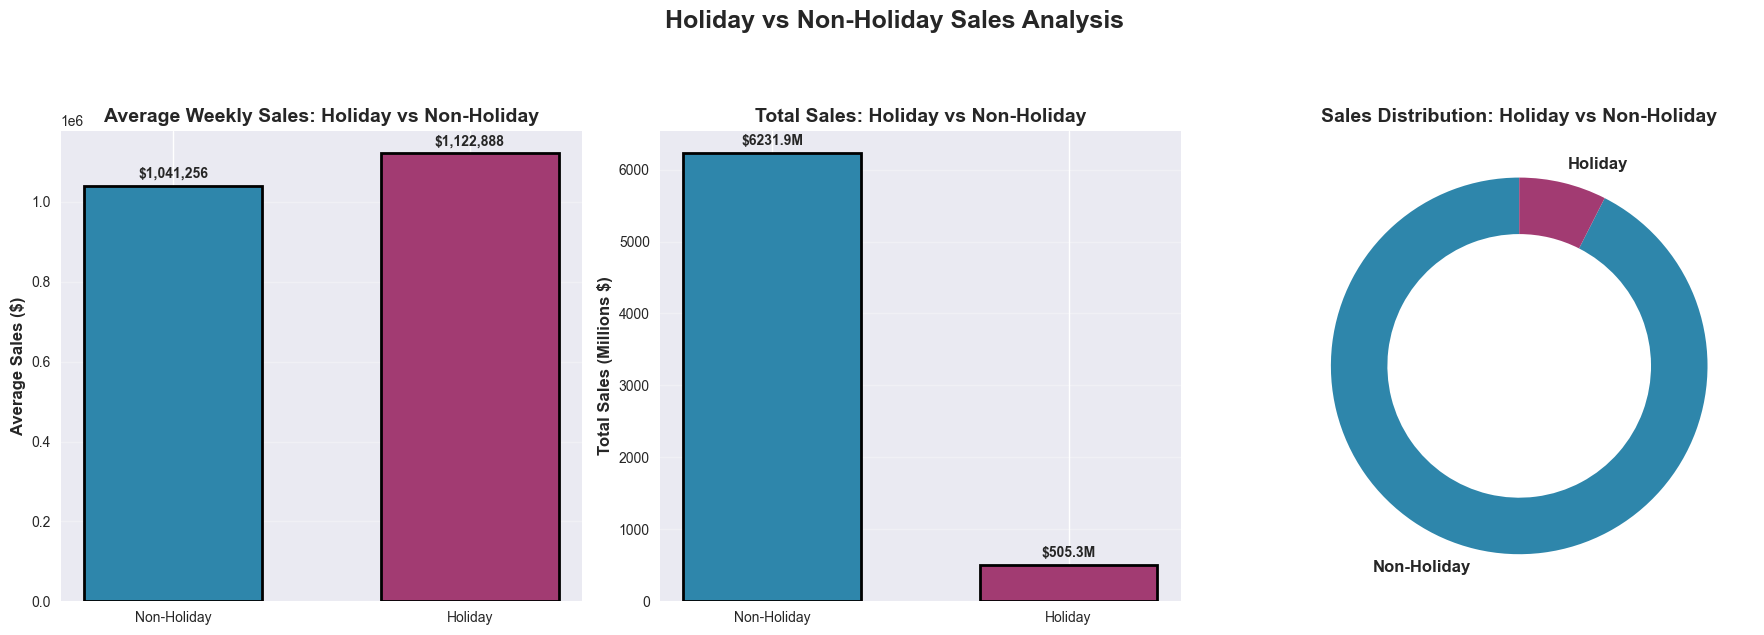

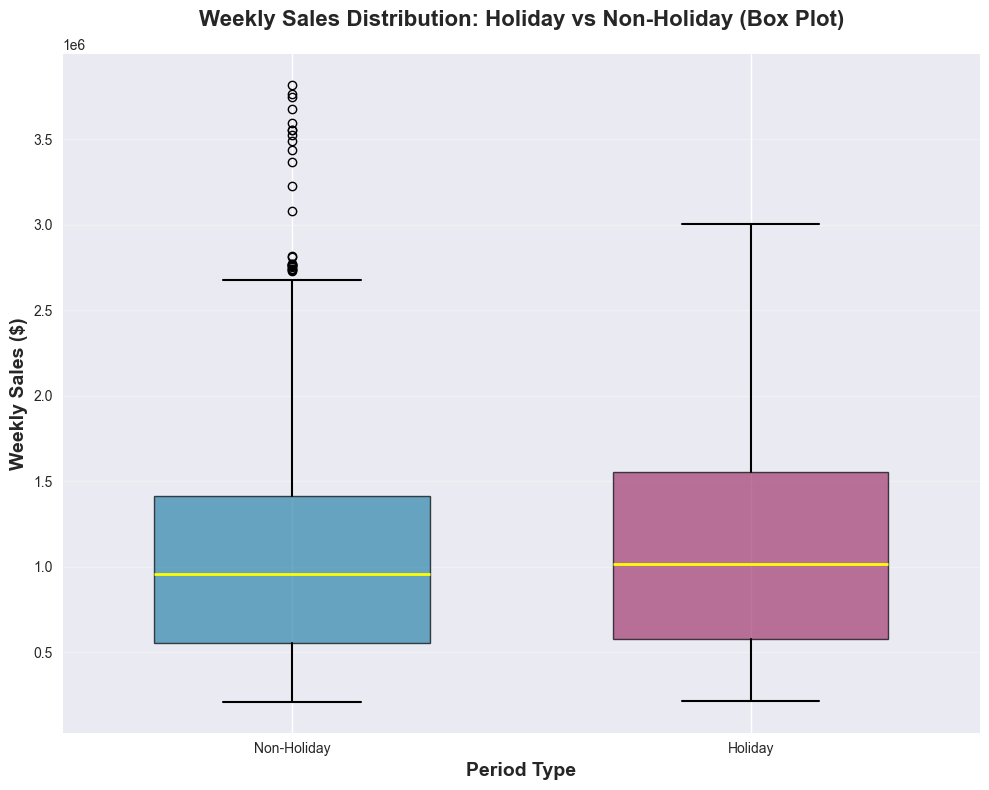

In [74]:
# Calculate sales statistics for holiday vs non-holiday
holiday_stats = df.groupby('Holiday_Flag')['Weekly_Sales'].agg(['mean', 'sum', 'count']).round(2)
holiday_stats.index = ['Non-Holiday', 'Holiday']

# Create comparison charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Bar chart for average sales
colors1 = ['#2E86AB', '#A23B72']
bars1 = axes[0].bar(holiday_stats.index, holiday_stats['mean'], color=colors1, 
                    edgecolor='black', linewidth=2, width=0.6)

axes[0].set_title('Average Weekly Sales: Holiday vs Non-Holiday', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Sales ($)', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars1, holiday_stats['mean']):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + max(holiday_stats['mean'])*0.01,
                 f'${value:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Bar chart for total sales
bars2 = axes[1].bar(holiday_stats.index, holiday_stats['sum']/1e6, color=colors1, 
                    edgecolor='black', linewidth=2, width=0.6)

axes[1].set_title('Total Sales: Holiday vs Non-Holiday', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Total Sales (Millions $)', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars2, holiday_stats['sum']/1e6):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + max(holiday_stats['sum']/1e6)*0.01,
                 f'${value:.1f}M', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. Donut chart for sales distribution
wedges, texts, autotexts = axes[2].pie(holiday_stats['sum'], labels=holiday_stats.index, 
                                        colors=colors1, autopct='%1.1f%%', startangle=90,
                                        textprops={'fontsize': 12, 'fontweight': 'bold'},
                                        wedgeprops=dict(width=0.3))

# Draw circle at center for donut chart
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
axes[2].add_artist(centre_circle)

axes[2].set_title('Sales Distribution: Holiday vs Non-Holiday', fontsize=14, fontweight='bold')

# Enhance autotexts
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.suptitle('Holiday vs Non-Holiday Sales Analysis', fontsize=18, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# Create a box plot for detailed comparison
plt.figure(figsize=(10, 8))
box_data = [df[df['Holiday_Flag'] == 0]['Weekly_Sales'],
            df[df['Holiday_Flag'] == 1]['Weekly_Sales']]

box = plt.boxplot(box_data, labels=['Non-Holiday', 'Holiday'], 
                  patch_artist=True, widths=0.6)

# Color the boxes
colors_box = ['#2E86AB', '#A23B72']
for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customize whiskers and caps
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
for median in box['medians']:
    median.set(color='yellow', linewidth=2)

plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday (Box Plot)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Period Type', fontsize=14, fontweight='bold')
plt.ylabel('Weekly Sales ($)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Summary Statistics Table

In [75]:
print("="*60)
print("SUMMARY STATISTICS FOR WALMART SALES DATA")
print("="*60)

# Create summary statistics
summary_stats = {
    'Metric': ['Total Sales', 'Average Weekly Sales', 'Number of Weeks', 
               'Max Weekly Sales', 'Min Weekly Sales', 'Std Deviation'],
    'Value': [
        f"${df['Weekly_Sales'].sum():,.2f}",
        f"${df['Weekly_Sales'].mean():,.2f}",
        f"{len(df):,}",
        f"${df['Weekly_Sales'].max():,.2f}",
        f"${df['Weekly_Sales'].min():,.2f}",
        f"${df['Weekly_Sales'].std():,.2f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
display(summary_df)

print("\n" + "="*60)
print("HOLIDAY VS NON-HOLIDAY COMPARISON")
print("="*60)
display(holiday_stats)

print("\n" + "="*60)
print("MONTHLY SALES SUMMARY")
print("="*60)
monthly_summary = monthly_sales.reset_index()
monthly_summary.columns = ['Month', 'Total Sales']
monthly_summary['Percentage'] = (monthly_summary['Total Sales'] / monthly_summary['Total Sales'].sum() * 100).round(2)
display(monthly_summary)

SUMMARY STATISTICS FOR WALMART SALES DATA


,Metric,Value
0,Total Sales,"$6,737,218,987.11"
1,Average Weekly Sales,"$1,046,964.88"
2,Number of Weeks,"6,435"
3,Max Weekly Sales,"$3,818,686.45"
4,Min Weekly Sales,"$209,986.25"
5,Std Deviation,"$564,366.62"



HOLIDAY VS NON-HOLIDAY COMPARISON


,mean,sum,count
Non-Holiday,1041256.38,6.231919e+09,5985
Holiday,1122887.89,5.052996e+08,450



MONTHLY SALES SUMMARY


,Month,Total Sales,Percentage
0,Jan,5.637697e+08,8.37
1,Feb,5.628742e+08,8.35
2,Mar,5.576548e+08,8.28
3,Apr,5.556543e+08,8.25
4,May,5.571314e+08,8.27
5,Jun,5.619280e+08,8.34
6,Jul,5.642419e+08,8.37
7,Aug,5.572220e+08,8.27
8,Sep,5.620799e+08,8.34
9,Oct,5.648976e+08,8.38


## Final Insights and Observations

In [76]:
print("="*80)
print("KEY INSIGHTS FROM WALMART SALES DATA ANALYSIS")
print("="*80)

insights = [
    "1. MONTHLY TRENDS: Certain months show significantly higher sales than others.",
    "2. TEMPERATURE IMPACT: Sales patterns vary across different temperature ranges.",
    "3. CPI RELATIONSHIP: Consumer Price Index shows correlation with sales volume.",
    "4. HOLIDAY EFFECT: Holiday weeks show different sales patterns compared to regular weeks.",
    "5. SEASONALITY: Clear seasonal patterns observed in the monthly sales data.",
    "6. SALES DISTRIBUTION: Sales are not evenly distributed throughout the year.",
    "7. PEAK PERIODS: Identify specific periods for inventory planning and staffing.",
    "8. OPTIMAL CONDITIONS: Certain temperature and economic conditions favor higher sales."
]

for insight in insights:
    print(f"• {insight}")

print("\n" + "="*80)
print("RECOMMENDATIONS FOR BUSINESS STRATEGY")
print("="*80)

recommendations = [
    "1. INVENTORY MANAGEMENT: Increase stock during high-sales months identified in analysis",
    "2. STAFFING: Plan additional staff during peak sales periods and holiday seasons",
    "3. PROMOTIONS: Time marketing campaigns with favorable temperature and economic conditions",
    "4. PRICING STRATEGY: Adjust pricing based on CPI trends and seasonal demand",
    "5. RESOURCE ALLOCATION: Allocate resources based on monthly sales patterns",
    "6. FORECASTING: Use temperature and CPI data for more accurate sales forecasting"
]

for rec in recommendations:
    print(f"✓ {rec}")

KEY INSIGHTS FROM WALMART SALES DATA ANALYSIS
• 1. MONTHLY TRENDS: Certain months show significantly higher sales than others.
• 2. TEMPERATURE IMPACT: Sales patterns vary across different temperature ranges.
• 3. CPI RELATIONSHIP: Consumer Price Index shows correlation with sales volume.
• 4. HOLIDAY EFFECT: Holiday weeks show different sales patterns compared to regular weeks.
• 5. SEASONALITY: Clear seasonal patterns observed in the monthly sales data.
• 6. SALES DISTRIBUTION: Sales are not evenly distributed throughout the year.
• 7. PEAK PERIODS: Identify specific periods for inventory planning and staffing.
• 8. OPTIMAL CONDITIONS: Certain temperature and economic conditions favor higher sales.

RECOMMENDATIONS FOR BUSINESS STRATEGY
✓ 1. INVENTORY MANAGEMENT: Increase stock during high-sales months identified in analysis
✓ 2. STAFFING: Plan additional staff during peak sales periods and holiday seasons
✓ 3. PROMOTIONS: Time marketing campaigns with favorable temperature and econo